# Laboratorio 4
### Deep learning
- Daniel Gomez 21429
- Abner Garcia 21285

In [1]:
import opendatasets as od
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from ydata_profiling import ProfileReport
from os import listdir
import shutil
import numpy as np
import keras.preprocessing.image as kerasImg
import keras.layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import ops

C:\Users\Personal\AppData\Local\Temp\ipykernel_1700\2044977975.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Inciso 1
Muestre algunos ejemplos de cada una de las modalidades que tiene

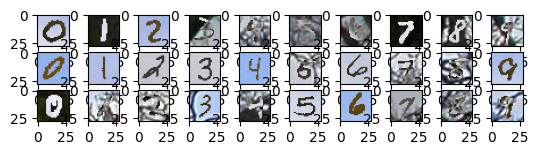

In [2]:
# M0
folder = "./PolyMNIST/MMNIST/train/m0/"

# for files named in the format: 0.0.png, 0.1.png, 0.2.png, 0.3.png, 0.4.png, 0.5.png, 0.6.png, 0.7.png, 0.8.png, 0.9.png, 1.0.png until 6739.1.png, 6740.1
# read all images in the folder
for i in range(0, 3):
    for j in range(0, 10):
        plt.subplot(10, 10, i * 10 + j + 1)
        filename = str(i) + "." + str(j) + ".png"
        image = imread(folder + filename)
        plt.imshow(image)


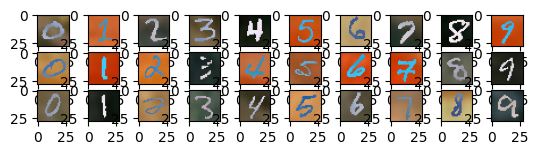

In [3]:
# M1
folder = "./PolyMNIST/MMNIST/train/m1/"

# for files named in the format: 0.0.png, 0.1.png, 0.2.png, 0.3.png, 0.4.png, 0.5.png, 0.6.png, 0.7.png, 0.8.png, 0.9.png, 1.0.png until 6739.1.png, 6740.1
# read all images in the folder
for i in range(0, 3):
  for j in range(0, 10):
    plt.subplot(10, 10, i * 10 + j + 1)
    filename = str(i) + "." + str(j) + ".png"
    image = imread(folder + filename)
    plt.imshow(image)


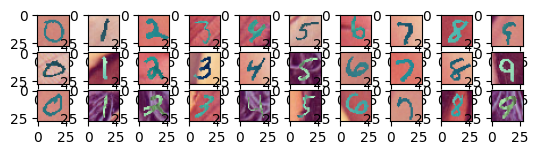

In [4]:
# M2
folder = "./PolyMNIST/MMNIST/train/m2/"

# for files named in the format: 0.0.png, 0.1.png, 0.2.png, 0.3.png, 0.4.png, 0.5.png, 0.6.png, 0.7.png, 0.8.png, 0.9.png, 1.0.png until 6739.1.png, 6740.1
# read all images in the folder
for i in range(0, 3):
  for j in range(0, 10):
    plt.subplot(10, 10, i * 10 + j + 1)
    filename = str(i) + "." + str(j) + ".png"
    image = imread(folder + filename)
    plt.imshow(image)


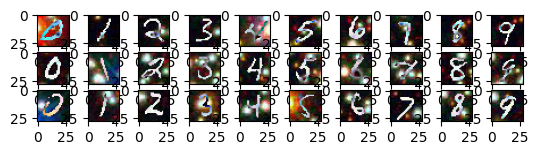

In [5]:
# M3
folder = "./PolyMNIST/MMNIST/train/m3/"

# for files named in the format: 0.0.png, 0.1.png, 0.2.png, 0.3.png, 0.4.png, 0.5.png, 0.6.png, 0.7.png, 0.8.png, 0.9.png, 1.0.png until 6739.1.png, 6740.1
# read all images in the folder
for i in range(0, 3):
  for j in range(0, 10):
    plt.subplot(10, 10, i * 10 + j + 1)
    filename = str(i) + "." + str(j) + ".png"
    image = imread(folder + filename)
    plt.imshow(image)


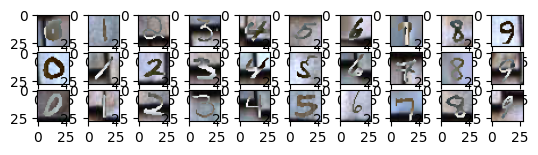

In [6]:
# M4
folder = "./PolyMNIST/MMNIST/train/m4/"

# for files named in the format: 0.0.png, 0.1.png, 0.2.png, 0.3.png, 0.4.png, 0.5.png, 0.6.png, 0.7.png, 0.8.png, 0.9.png, 1.0.png until 6739.1.png, 6740.1
# read all images in the folder
for i in range(0, 3):
  for j in range(0, 10):
    plt.subplot(10, 10, i * 10 + j + 1)
    filename = str(i) + "." + str(j) + ".png"
    image = imread(folder + filename)
    plt.imshow(image)


### Inciso 2
Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis. Especifique la resolución de las imágenes, la distribución del conjunto de datos, si está balanceado o no, etc

In [7]:
# exploratory analysis
# describe resolution of images
# data distribution
# if its balanced or not
classes = ["m0", "m1", "m2", "m3", "m4"]
images = []

for c in classes:
    path = "./PolyMNIST/MMNIST/train/" + c + "/"
    for img in listdir(path):
        images.append((c, img))

df = pd.DataFrame(images, columns=["class", "image"])


<Axes: >

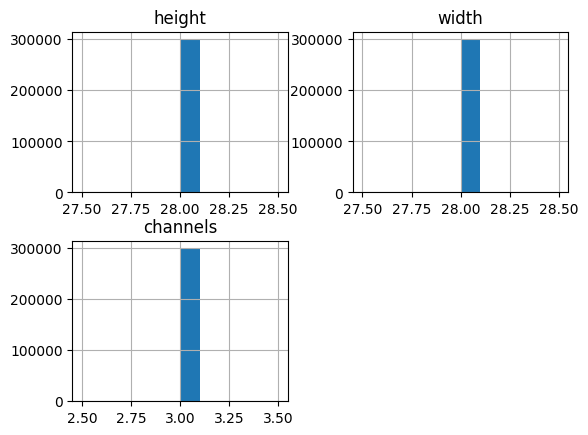

In [8]:

# describe resolution of images
df["image"] = df["class"] + "/" + df["image"]
df["shape"] = df["image"].apply(lambda x: imread("./PolyMNIST/MMNIST/train/" + x).shape)
df["height"] = df["shape"].apply(lambda x: x[0])
df["width"] = df["shape"].apply(lambda x: x[1])
df["channels"] = df["shape"].apply(lambda x: x[2])
# show the mean resolution of images, height, width, channels
df[["height", "width", "channels"]].mean()
# show the median resolution of images, height, width, channels
df[["height", "width", "channels"]].median()
# show the mode resolution of images, height, width, channels
df[["height", "width", "channels"]].mode()
# show the standard deviation resolution of images, height, width, channels
df[["height", "width", "channels"]].std()
# show them in a histogram
df[["height", "width", "channels"]].hist()
# show them in a boxplot
df[["height", "width", "channels"]].boxplot()


In [9]:
df.head()

,class,image,shape,height,width,channels
0,m0,m0/0.0.png,"(28, 28, 3)",28,28,3
1,m0,m0/0.1.png,"(28, 28, 3)",28,28,3
2,m0,m0/0.2.png,"(28, 28, 3)",28,28,3
3,m0,m0/0.3.png,"(28, 28, 3)",28,28,3
4,m0,m0/0.4.png,"(28, 28, 3)",28,28,3


In [10]:
df.describe()

,height,width,channels
count,300000.0,300000.0,300000.0
mean,28.0,28.0,3.0
std,0.0,0.0,0.0
min,28.0,28.0,3.0
25%,28.0,28.0,3.0
50%,28.0,28.0,3.0
75%,28.0,28.0,3.0
max,28.0,28.0,3.0


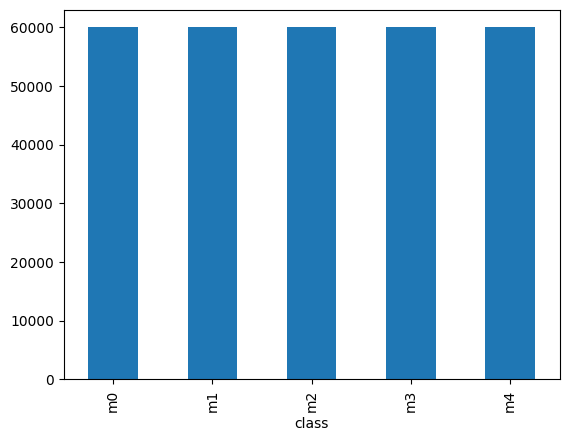

In [11]:
# data distribution
df["class"].value_counts().plot(kind="bar")
plt.show()

In [12]:
# if its balanced or not
df["class"].value_counts()

class
m0    60000
m1    60000
m2    60000
m3    60000
m4    60000
Name: count, dtype: int64

In [13]:
analysis = ProfileReport(df)
analysis.to_file('analysis.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 157.84it/s]


### Inciso 3
Haga al menos 2 modelos de Deep learning, determine la efectividad de cada uno y seleccione el mejor de ellos.

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Definir la carpeta de imágenes
folder = "./PolyMNIST/MMNIST/train/m0/"

# Leer todas las imágenes y etiquetas
images = []
labels = []

for i in range(6741):
    for j in range(10):
        filename = f"{i}.{j}.png"
        filepath = os.path.join(folder, filename)
        if os.path.exists(filepath):
            image = imread(filepath)
            images.append(image)
            labels.append(j)

# Convertir a arrays de numpy
images = np.array(images)
labels = np.array(labels)

# Normalizar las imágenes
images = images.astype('float32') / 255.0

# Convertir las etiquetas a categorías
labels = to_categorical(labels, 10)

# Dividir los datos en entrenamiento y validación
x_train, x_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

C:\Users\Personal\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history1 = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)
history2 = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=128)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.5029 - loss: 1.4803 - val_accuracy: 0.8955 - val_loss: 0.3681
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8584 - loss: 0.4617 - val_accuracy: 0.9218 - val_loss: 0.2632
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.8890 - loss: 0.3577 - val_accuracy: 0.9318 - val_loss: 0.2243
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9098 - loss: 0.2848 - val_accuracy: 0.9351 - val_loss: 0.2059
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9201 - loss: 0.2522 - val_accuracy: 0.9400 - val_loss: 0.1966
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9269 - loss: 0.2267 - val_accuracy: 0.9403 - val_loss: 0.1885
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9363 - loss: 0.1990 - val_accuracy: 0.9442 - val_loss: 0.1835
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9383 - loss: 0.1898 - val_acc

In [29]:
val_loss1, val_acc1 = model1.evaluate(x_val, y_val)
val_loss2, val_acc2 = model2.evaluate(x_val, y_val)

print(f'Modelo 1 - Precisión en validación: {val_acc1}')
print(f'Modelo 2 - Precisión en validación: {val_acc2}')

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9425 - loss: 0.1844
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9687 - loss: 0.1054
Modelo 1 - Precisión en validación: 0.9461666941642761
Modelo 2 - Precisión en validación: 0.9703333377838135


In [30]:
if val_acc1 > val_acc2:
    print("El Modelo 1 es el mejor.")
else:
    print("El Modelo 2 es el mejor.")

El Modelo 2 es el mejor.
